In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape


(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# looks like a imbalanced classification 

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis =1, inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# the end goal is just to learn the ANN model using keras, so wont focus in feature engineering part for now.


In [12]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
# before training the neural network, we need to make sure to scale the datasets.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train.shape

(8000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras is a high-level library that runs over the tensorflow.
In Keras, we can build two models, sequential and non-sequential (functional) model. 
Sequential is a easy apporoach which is a linear stack of layers where we can add one layer at a time.

In [22]:
model = Sequential()

In [23]:
# building a neural network architecture
model.add(Dense(11, activation = 'relu', input_dim = 11)) #hidden layer
model.add(Dense(11, activation = 'relu')) #hidden layer
model.add(Dense(1, activation = 'sigmoid' )) #output layer

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


Compilation stage: we need to mention the loss function and optimizer for gradient descent.

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [26]:
#model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2) # training the NN

In [27]:
model.layers[0].get_weights()

[array([[-0.45983213,  0.35873294, -0.15661645,  0.49202245,  0.38128823,
          0.39841682,  0.0413208 , -0.16130736,  0.18970102,  0.18594092,
         -0.09445816],
        [-0.26274383,  0.46368772,  0.19685948, -0.28650033, -0.20755026,
         -0.5220715 ,  0.31900096,  0.3422833 ,  0.35008985,  0.1756804 ,
          0.13814896],
        [ 0.40229607,  0.05730128,  0.17879081,  0.10735792, -0.02883542,
         -0.05226135,  0.36751193,  0.06909263, -0.22493461, -0.37894866,
         -0.4481445 ],
        [ 0.22068107,  0.2771846 ,  0.43739855,  0.07907909, -0.01409417,
          0.4874552 , -0.29732937, -0.284171  , -0.02599147,  0.0113858 ,
          0.3635733 ],
        [ 0.14879346,  0.15052241, -0.35339734,  0.47223818,  0.28445226,
         -0.00624478,  0.06112796, -0.32007235,  0.09323907,  0.5160311 ,
          0.19606137],
        [-0.05965587,  0.07866395, -0.16862866,  0.49217194, -0.5120494 ,
         -0.46675825, -0.07876468, -0.14530358, -0.01792324,  0.0171706

The value of trainable parameters ie. weights and biases.

In [28]:
model.layers[1].get_weights()

[array([[ 0.07338423,  0.37066066,  0.3883437 ,  0.3932851 ,  0.14840043,
          0.4467156 ,  0.29376137, -0.42814645, -0.21184722,  0.31598765,
          0.32607126],
        [-0.29105216,  0.14928842,  0.26543438,  0.48681384,  0.3425033 ,
         -0.05055407, -0.17691693, -0.0360271 , -0.22933069,  0.35684913,
          0.44773686],
        [-0.37910855, -0.05732954,  0.0182783 , -0.45618647, -0.28147486,
          0.36554193,  0.4865567 , -0.29302466,  0.45852268, -0.5086907 ,
         -0.21220782],
        [-0.27244127,  0.4307269 , -0.20459029, -0.16449669, -0.35490242,
          0.43622887,  0.0760684 , -0.13788116,  0.0503847 ,  0.12663817,
          0.3390239 ],
        [-0.21929443,  0.22021592, -0.28985563, -0.04750893,  0.32068795,
         -0.29367995,  0.30898064,  0.36324126,  0.42285877,  0.16178846,
          0.07531124],
        [ 0.3548261 , -0.25638908, -0.3847927 , -0.43685478,  0.2509343 ,
          0.21955717,  0.5004932 ,  0.3845439 ,  0.22239423,  0.0342592

weights and bias value of final layer.

In [29]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.510599  ],
       [0.52491915],
       [0.5124235 ],
       ...,
       [0.38481382],
       [0.45057014],
       [0.4842431 ]], dtype=float32)

since activation function is sigmoid.

In [30]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1,0)

63/63 [==============================] - 0s 1ms/step


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.586

Now, for the improvement in the model performance, we can at first apply following steps:
- increase no. of epochs
- apply different activation function, relu can be effective.
- increase no. of nodes in the hidden layer
- increase the no. of hidden layers. But, adding no. of hidden layers unnecessarily can create the problem of overfitting.

By adding 'accuracy' as metrics during compilation, we can see accuracy in every epochs along with loss.

We can observe that the accuracy of the training data is increasing while the accuracy of validating data is stagnating, so might be the case of overfitting.

In [32]:
# for plotting graph side by side. 
import matplotlib.pyplot as plt
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)



Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5338 - accuracy: 0.7798 - val_loss: 0.4733 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7984 - val_loss: 0.4418 - val_accuracy: 0.8006
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8094 - val_loss: 0.4292 - val_accuracy: 0.8075
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8163 - val_loss: 0.4207 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8244 - val_loss: 0.4103 - val_accuracy: 0.8150
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8336 - val_loss: 0.3992 - val_accuracy: 0.8244
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8436 - val_loss: 0.3850 - val_accuracy: 0.8325

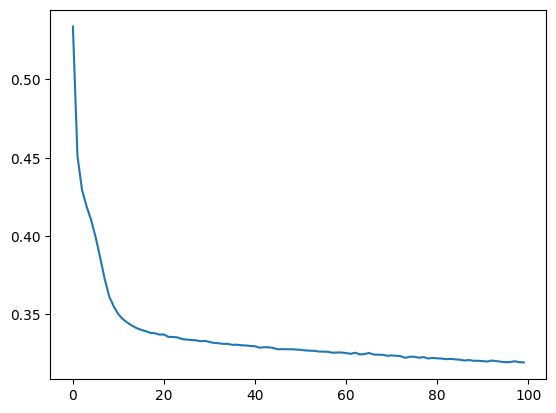

In [33]:
plt.plot(history.history['loss'])

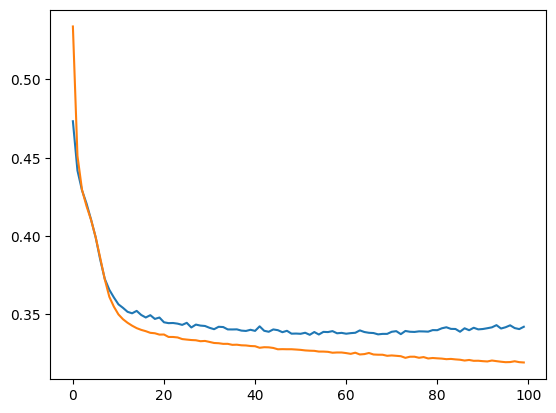

In [34]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

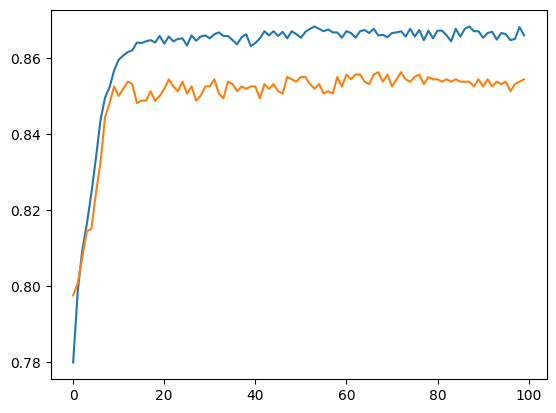

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Finally, we can observe from both comparision graphs:
- The model is somehow performing satisfactory.
- The gap between the blue and the orange plot shows us the level of overfitting happening in our model. 
- concepts like regularization, dropout of layers, etc should be applied in our model. 